## Inclusão das Bibliotecas


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, ifft, fftfreq, fftshift
from scipy.io.wavfile import write, read
from IPython.display import Audio
import os

## Recuperando o Sinal

In [15]:
amostra_por_sec1, x1 = wavfile.read('./audios/a01.wav')
amostra_por_sec2, x2 = wavfile.read('./audios/a02.wav')

print(f"Taxa de amostragem 1: {amostra_por_sec1} Hz")
print(f"Sinal x1[n]: {x1}")
print(f"Quantidade de emissões: {len(x1)}")

print(f"Taxa de amostragem 2: {amostra_por_sec2} Hz")
print(f"Sinal x2[n]: {x2}")
print(f"Quantidade de emissões: {len(x2)}")

Taxa de amostragem 1: 44100 Hz
Sinal x1[n]: [ 107   79    9 ...  -55 -188 -160]
Quantidade de emissões: 622173
Taxa de amostragem 2: 22050 Hz
Sinal x2[n]: [-2685 -1229  1533 ...  -449   -86   311]
Quantidade de emissões: 300449


## Sinal no tempo


Comprimento do áudio 1: 14.108231292517006 segundos
Comprimento do áudio 2: 13.625804988662132 segundos


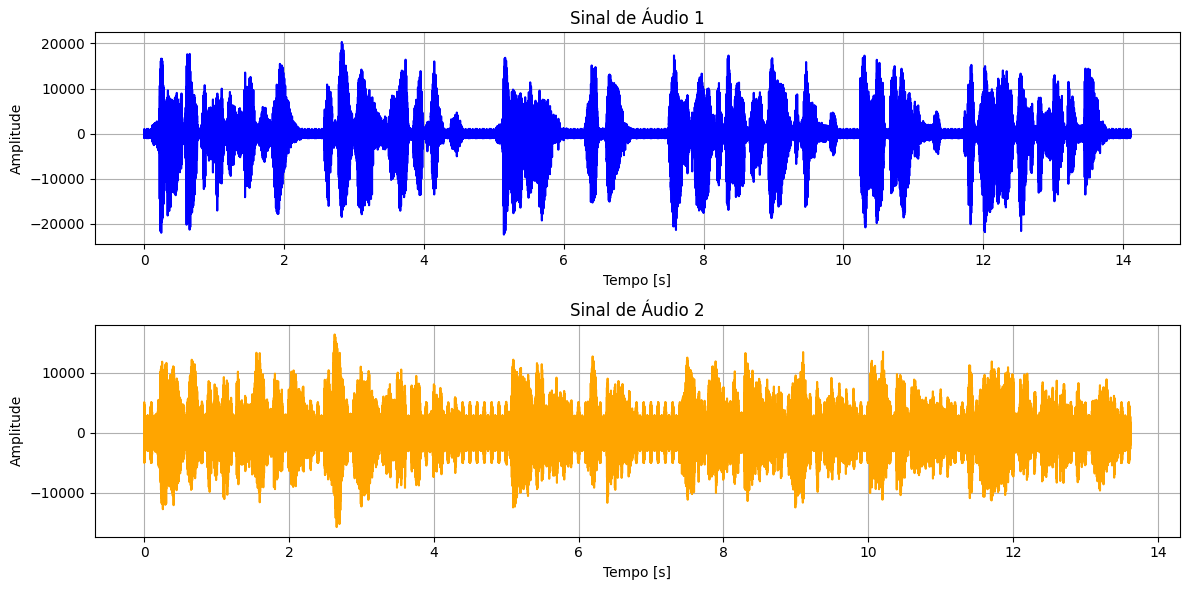

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular a duração do áudio
length1 = len(x1) / amostra_por_sec1
length2 = len(x2) / amostra_por_sec2
print(f"Comprimento do áudio 1: {length1} segundos")
print(f"Comprimento do áudio 2: {length2} segundos")

time1 = np.linspace(0., length1, len(x1))
time2 = np.linspace(0., length2, len(x2))

# Criar subplots
plt.figure(figsize=(12, 6))

# Primeiro subplot para o áudio 1
plt.subplot(2, 1, 1)  # 2 linhas, 1 coluna, primeiro gráfico
plt.plot(time1, x1, color='blue')
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.title("Sinal de Áudio 1")
plt.grid()

# Segundo subplot para o áudio 2
plt.subplot(2, 1, 2)  # 2 linhas, 1 coluna, segundo gráfico
plt.plot(time2, x2, color='orange')
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.title("Sinal de Áudio 2")
plt.grid()

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

## Sinal na Frequência


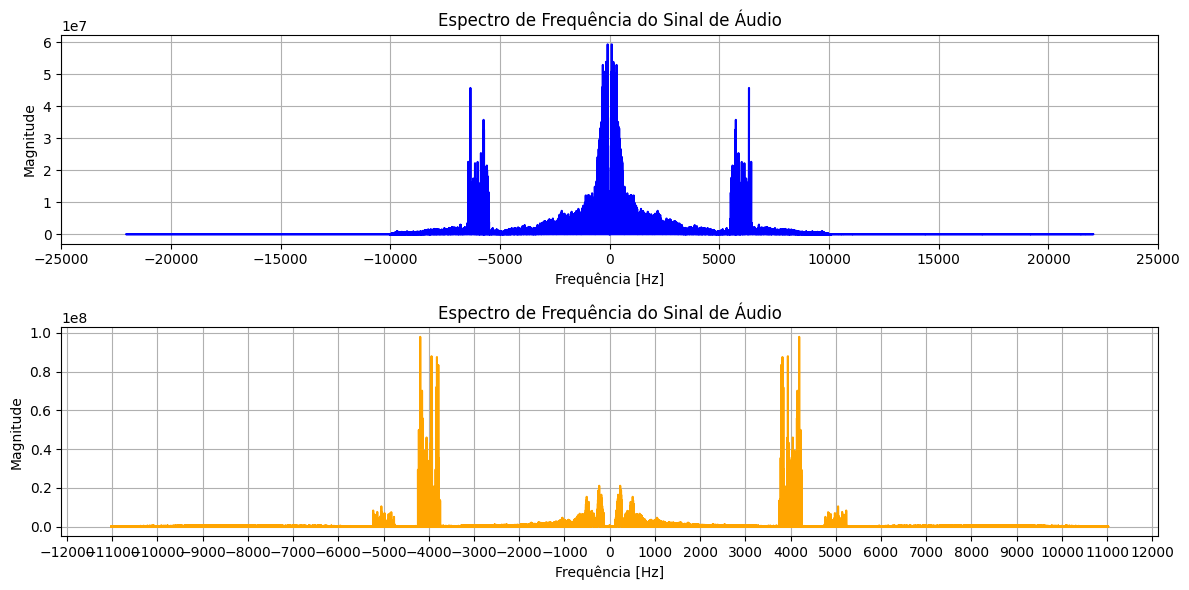

In [17]:
# Calcular a FFT do sinal
yf1 = fft(x1)  # Calcula aSFast Fourier Transform (FFT)
yf2 = fft(x2)
xf1 = fftfreq(len(x1), 1 / amostra_por_sec1)  # Calcula as frequências correspondentes
xf2 = fftfreq(len(x2), 1 / amostra_por_sec2)

# Criar subplots
plt.figure(figsize=(12, 6))

# Plotar o espectro de frequência
plt.subplot(2, 1, 1)
plt.plot(xf1, np.abs(yf1), label="Espectro de Frequência", color = 'blue')
plt.xlabel("Frequência [Hz]")
plt.ylabel("Magnitude")
plt.title("Espectro de Frequência do Sinal de Áudio")
plt.grid()

# Adicionar ticks a cada 5000 Hz, simétricos em relação ao 0 Hz
max_freq = max(np.abs(xf1))  # Frequência máxima (positiva ou negativa)
max_freq = int(np.ceil(max_freq / 5000)) * 5000  # Arredonda para o próximo múltiplo de 5000 Hz
ticks_x1 = np.arange(-max_freq, max_freq + 5000, 5000)  # Ticks a cada 5000 Hz, simétricos
plt.xticks(ticks_x1)

plt.subplot(2, 1, 2)
plt.plot(xf2, np.abs(yf2), label="Espectro de Frequência", color = 'orange')
plt.xlabel("Frequência [Hz]")
plt.ylabel("Magnitude")
plt.title("Espectro de Frequência do Sinal de Áudio")
plt.grid()

# Adicionar ticks a cada 1000 Hz, simétricos em relação ao 0 Hz
max_freq = max(np.abs(xf2))  # Frequência máxima (positiva ou negativa)
max_freq = int(np.ceil(max_freq / 1000)) * 1000  # Arredonda para o próximo múltiplo de 1000 Hz
ticks_x1 = np.arange(-max_freq, max_freq + 1000, 1000)  # Ticks a cada 1000 Hz, simétricos
plt.xticks(ticks_x1)

plt.tight_layout()
plt.show()

##### Levando em conta a teoria fornecida pelo livro, para calcular a magnitude em decibéis

\begin{equation}
{|H(e^{j\omega})|_{dB}} = 20 \cdot \log_{10} {|H(e^{j\omega})|}
\end{equation}


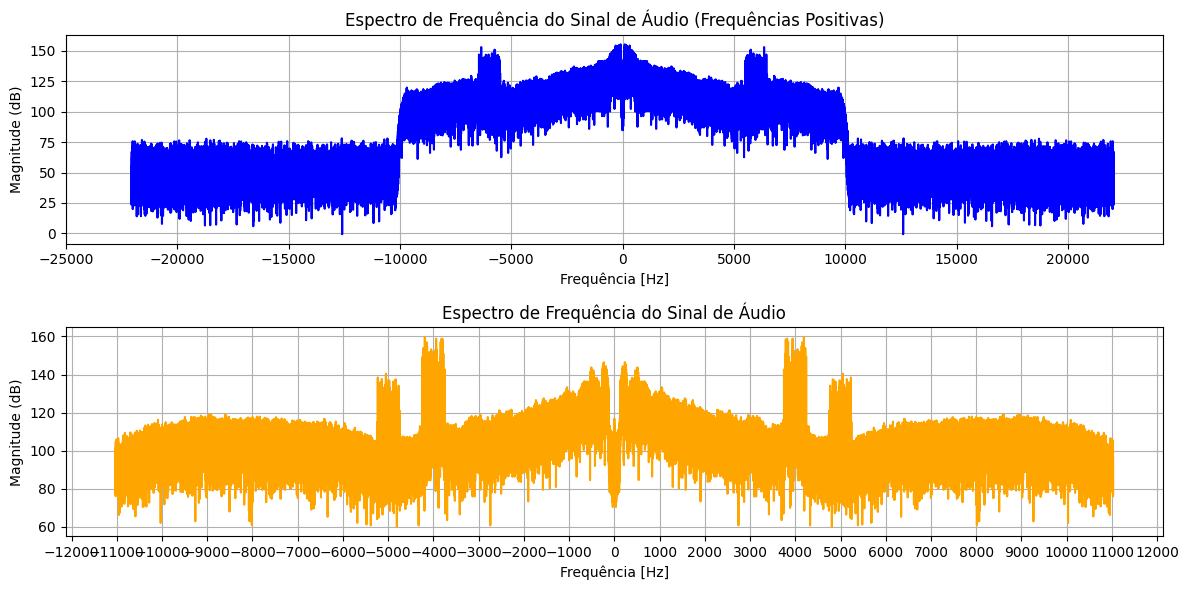

In [18]:
# Calcular a FFT dos sinais
yf1 = fft(x1)  # Calcula a Fast Fourier Transform (FFT)
yf2 = fft(x2)
xf1 = fftfreq(len(x1), 1 / amostra_por_sec1)  # Calcula as frequências correspondentes aos índices da FFT
xf2 = fftfreq(len(x2), 1 / amostra_por_sec2)

# Converter magnitude para decibéis
yf1_db = 20 * np.log10(np.abs(yf1))  # Adiciona 1e-12 para evitar log(0)
yf2_db = 20 * np.log10(np.abs(yf2))  # Adiciona 1e-12 para evitar log(0)

# Criar subplots
plt.figure(figsize=(12, 6))

# Plotar o espectro de frequência (apenas frequências positivas)
plt.subplot(2, 1, 1)
plt.plot(fftshift(xf1), fftshift(yf1_db), label="Espectro de Frequência", color='blue')
plt.xlabel("Frequência [Hz]")
plt.ylabel("Magnitude (dB)")
plt.title("Espectro de Frequência do Sinal de Áudio (Frequências Positivas)")
plt.grid()

# Adicionar ticks a cada 5000 Hz
max_freq = max(xf1)  # Frequência máxima positiva
max_freq = int(np.ceil(max_freq / 5000)) * 5000  # Arredonda para o próximo múltiplo de 5000 Hz
ticks_x1 = np.arange(-max_freq, max_freq, 5000)  # Ticks a cada 5000 Hz
plt.xticks(ticks_x1)

plt.subplot(2, 1, 2)
plt.plot(fftshift(xf2), fftshift(yf2_db), label="Espectro de Frequência", color='orange')
plt.xlabel("Frequência [Hz]")
plt.ylabel("Magnitude (dB)")
plt.title("Espectro de Frequência do Sinal de Áudio")
plt.grid()

# Adicionar ticks a cada 1000 Hz
max_freq = max(xf2)  # Frequência máxima positiva
max_freq = int(np.ceil(max_freq / 1000)) * 1000  # Arredonda para o próximo múltiplo de 1000 Hz
ticks_x1 = np.arange(- max_freq, max_freq + 1000, 1000)  # Ticks a cada 1000 Hz
plt.xticks(ticks_x1)

plt.tight_layout()
plt.show()

## Implementação do Filtro


##### Criando um filtro a partir da técnica do Janelamento



*   Por que o Janelamento?
  - Queremos escolher um filtro ideal seletivo em frequência adequado e, em seguida, janelar sua resposta ao impulso, obtendo um filtro causal e de fase linear.
* Aplicando um filtro Ideal
  - Para a implementação do janelamento, vamos definir um filtro ideal com ganho de magnitude unitária e com fase linear em sua banda de passagem, além de ter respsota 0 na sua banda de rejeição




Seja a resposta ao impulso de um filtro ideal h. Queremos aproximar por uma resposta de duração finita

Ou seja, h[n] = 0 quando n < 0 e n > M

Para a aproximação, podemos utilizar a solução que minimiza o erro quadrático abaixo:

\begin{equation*}
E^2 = \sum_{n=-\infty}^\infty |h_a[n] - h[n]|^2
\end{equation*}

Obs: temos que a frequência de nyquist é:
Fnyq = taxa_de_amostragem/2 = 44100/2 = 22050

Além disso, temos que nossa resposta ao impulso de um filtro FIR é dada pela seguinte equação:

\begin{equation*}
h[n] = \frac{\sin(\omega_c(n-\alpha))}{\pi(n-\alpha)}
\end{equation*}

Sabendo que, pela técnica do Janelmento:

\begin{equation*}
  h(n) = h_d(n)\omega(n)
\end{equation*}

E levando em conta que:

\begin{equation*}
  \alpha = \frac{M - 1}2
\end{equation*}

E que:

\begin{equation}
h(n) =
\begin{cases}
h_d(n), & 0 \leq n \leq M-1 \\
0, & \text{Todo o resto}
\end{cases}
\end{equation}

Vamos definir:

\begin{equation}
h_d[n] = \frac{\sin(\omega_c(n-\alpha))}{\pi(n-\alpha)}
\end{equation}

Assim, temos:

\begin{equation}
h_d[n] = \frac{\sin(\omega_c(n-\frac{M-1}{2}))}{\pi(n-\frac{M-1}{2})}
\end{equation}


Chegamos, então, à seguinte equação:

\begin{equation}
h[n] = \frac{\sin(\omega_c(n-\frac{M-1}{2}))}{\pi(n-\frac{M-1}{2})} \cdot w[n]
\end{equation}

Agora, falta definirmos nosso \begin{equation*}
  w[n]
\end{equation*}

Para isso, temos que definir nosso método de janelamento. Seguindo o que é mostrado na seção 6.7.2 do livro Oppenheim e levando em conta o capítulo 7 do livro de Proakis, podemos utilizar o método de Hamming, que suaviza os truncamentos gerados pela sinc:

\begin{equation*}
w[n] = 0.54 - 0.46 \cos\left(\frac{2\pi n}{L-1}\right)
\end{equation*}

Com esse arcabouço, podemos, finalmente, criar nosso filtro utilizando um filtro ideal:

##### Criando um filtro ideal - Resposta em frequência objetiva



*   X1:
 - Analisando o sinal, percebe-se que tem frequências indesejadas quando ω assume valores < -5000 e > 5000, esses são vistos como picos de frequência no gráfico de x[n] no domínio da frequência. Na verdade, para ser mais aproximado, podemos considerar a frequência de corte como o módulo de |5200|
*   X2:
 - Analisando o sinal, percebe-se que tem frequências indesejadas quando ω assume valores < -3500 e > 3500, esses são vistos como picos de frequência no gráfico de x[n] no domínio da frequência. Na verdade, para ser mais aproximado, podemos considerar a frequência de corte como o módulo de |3500|





##### Criando um filtro com o janelamento de Hamming


In [19]:
def filtro_h_d(w_c, L):
    n = np.arange(L) - (L - 1) / 2  # n centralizado
    h = np.sin(w_c * n) / (np.pi * n)  # Resposta ao impulso ideal
    h[(L - 1) // 2] = w_c / np.pi  # Corrige o valor para n = 0 (limite)
    return h

In [20]:
def window_hamming(L):
  w = 0.54 - 0.46 * np.cos((2 * np.pi * np.arange(L)) / (L - 1))
  return w

##### Filtro h1


C:\Users\Vinicius\AppData\Local\Temp\ipykernel_920\2338817802.py:3: RuntimeWarning: invalid value encountered in divide
  h = np.sin(w_c * n) / (np.pi * n)  # Resposta ao impulso ideal


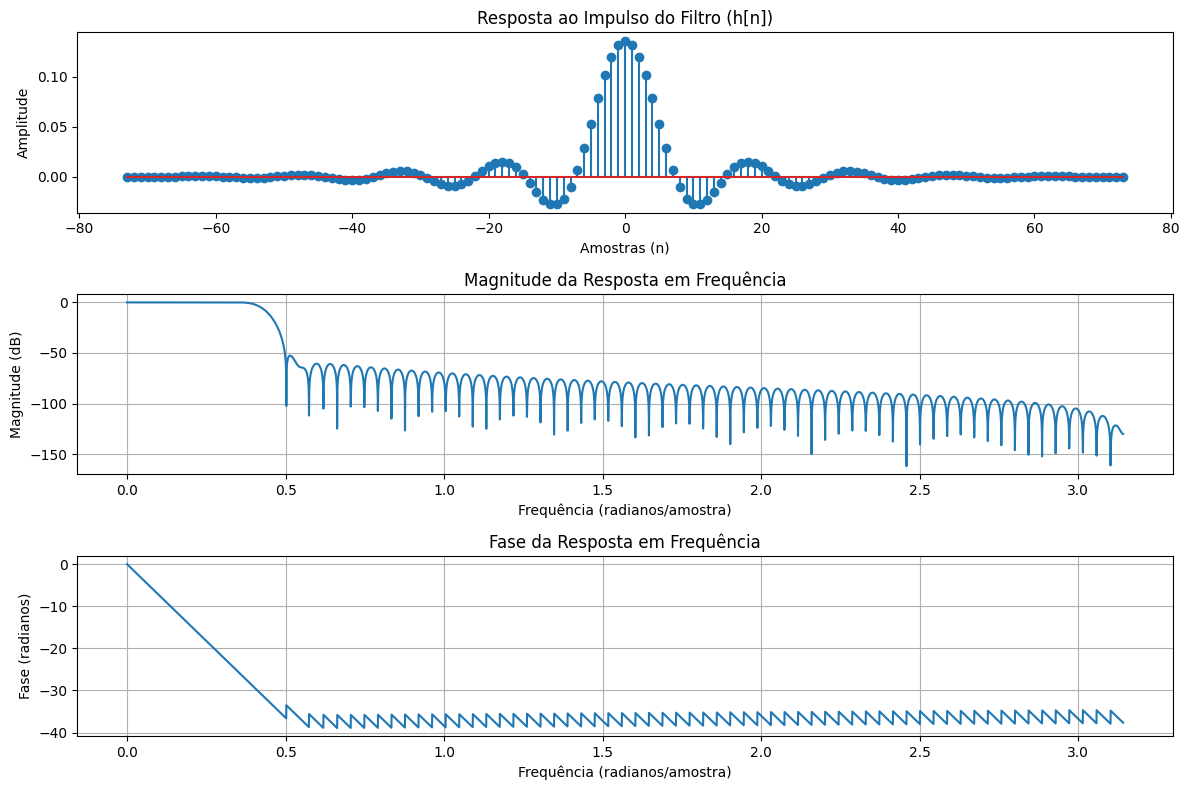

In [21]:
# Parâmetros do filtro
f_s1 = 44100  # Taxa de amostragem em Hz
L = 1000
l = L * 2 * np.pi / f_s1
w_c = 3000 * 2 * np.pi / f_s1  # Banda de corte normalizada
tam = int(np.ceil(6.6 * np.pi / l) + 1)  # Tamanho do filtro

# Projetando o filtro e aplicando a janela de Hamming:
h_hamming1 = filtro_h_d(w_c, tam) * window_hamming(tam)
n = np.arange(tam) - (tam - 1) / 2  # Para n=0 ser o termo central

# Plotando h[n] no tempo:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.stem(n, h_hamming1)
plt.title('Resposta ao Impulso do Filtro (h[n])')
plt.xlabel('Amostras (n)')
plt.ylabel('Amplitude')

# 2. Calculando a resposta em frequência:
N_fft = 8000  # Número de pontos para a FFT
w = np.linspace(0, np.pi, N_fft, endpoint=False)  # Frequências angulares normalizadas
H = np.zeros(N_fft, dtype=complex)

for i in range(N_fft):
    for k in range(len(h_hamming1)):
        H[i] += h_hamming1[k] * np.exp(-1j * w[i] * k)

# 3. Plotar a magnitude da resposta em frequência
magnitude = np.abs(H)
magnitude_dB = 20 * np.log10(magnitude)  # Convertendo para dB

plt.subplot(3, 1, 2)
plt.plot(w, magnitude_dB)
plt.title('Magnitude da Resposta em Frequência')
plt.xlabel('Frequência (radianos/amostra)')
plt.ylabel('Magnitude (dB)')
plt.grid()

# 4. Plotar a fase da resposta em frequência
phase = np.angle(H)
phase = np.unwrap(phase)  # Desenrola a fase -> Passa a ser representada de forma contínua

plt.subplot(3, 1, 3)
plt.plot(w, phase)
plt.title('Fase da Resposta em Frequência')
plt.xlabel('Frequência (radianos/amostra)')
plt.ylabel('Fase (radianos)')
plt.grid()

plt.tight_layout()
plt.show()

##### Filtro h2


C:\Users\Vinicius\AppData\Local\Temp\ipykernel_920\2338817802.py:3: RuntimeWarning: invalid value encountered in divide
  h = np.sin(w_c * n) / (np.pi * n)  # Resposta ao impulso ideal


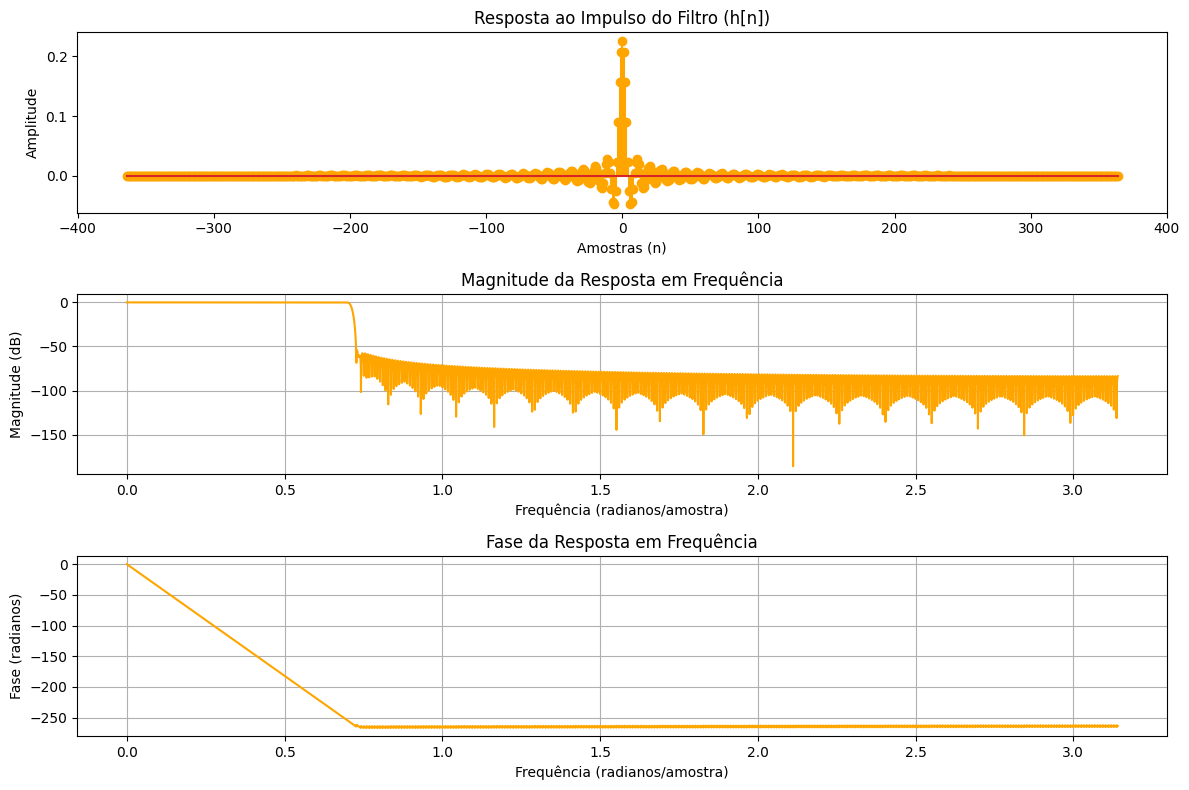

In [22]:
# Parâmetros do filtro:
f_s2 = 22050  # Taxa de amostragem em Hz
w_c = 2500 * 2 * np.pi / f_s2  # Banda passante normalizada
L = 100
l = L * 2 * np.pi / f_s2
tam = int(np.ceil(6.6 * np.pi / l) + 1)  # Comprimento do filtro

# Projetando o filtro e aplicando a janela de Hamming:
h_hamming2 = filtro_h_d(w_c, tam) * window_hamming(tam)
n = np.arange(len(h_hamming2)) - (len(h_hamming2) - 1) / 2  # Para n=0 ser o termo central

# 1. Plotando h[n] no tempo:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.stem(n, h_hamming2, linefmt='orange')
plt.title('Resposta ao Impulso do Filtro (h[n])')
plt.xlabel('Amostras (n)')
plt.ylabel('Amplitude')

# 2. Calculando a resposta em frequência:
N_fft = 8000  # Número de pontos para a FFT
w = np.linspace(0, np.pi, N_fft, endpoint=False)  # Frequências angulares normalizadas
H = np.zeros(N_fft, dtype=complex)

for i in range(N_fft):
    for k in range(len(h_hamming2)):
        H[i] += h_hamming2[k] * np.exp(-1j * w[i] * k)

# 3. Plotando a magnitude da resposta em frequência:
magnitude = np.abs(H)
magnitude_dB = 20 * np.log10(magnitude)  # Convertendo para dB

plt.subplot(3, 1, 2)
plt.plot(w, magnitude_dB, color='orange')
plt.title('Magnitude da Resposta em Frequência')
plt.xlabel('Frequência (radianos/amostra)')
plt.ylabel('Magnitude (dB)')
plt.grid()

# 4. Plotando a fase da resposta em frequência:
phase = np.angle(H)
phase = np.unwrap(phase)  # Desenrola a fase -> Passa a ser representada de forma contínua

plt.subplot(3, 1, 3)
plt.plot(w, phase, color='orange')
plt.title('Fase da Resposta em Frequência')
plt.xlabel('Frequência (radianos/amostra)')
plt.ylabel('Fase (radianos)')
plt.grid()

plt.tight_layout()
plt.show()

## Filtrando os sinais

##### Função de Convolução


In [23]:
def convolucao_fft(x, h):
    N = len(x)
    M = len(h)
    L = N + M - 1  # Tamanho do sinal resultante

    # Aplica zero-padding nos sinais para o tamanho L
    x_padded = np.pad(x, (0, L - N), mode='constant')
    h_padded = np.pad(h, (0, L - M), mode='constant')

    # Transformada de Fourier dos sinais
    X = fft(x_padded)
    H = fft(h_padded)

    # Multiplicação no domínio da frequência
    Y = X * H

    # Transformada inversa para voltar ao domínio do tempo
    y = ifft(Y).real  # Usamos .real para descartar a parte imaginária (devido a erros numéricos)

    # Corta o sinal para o tamanho original de x
    y = y[:N]

    return y

##### X1 filtrado com h1


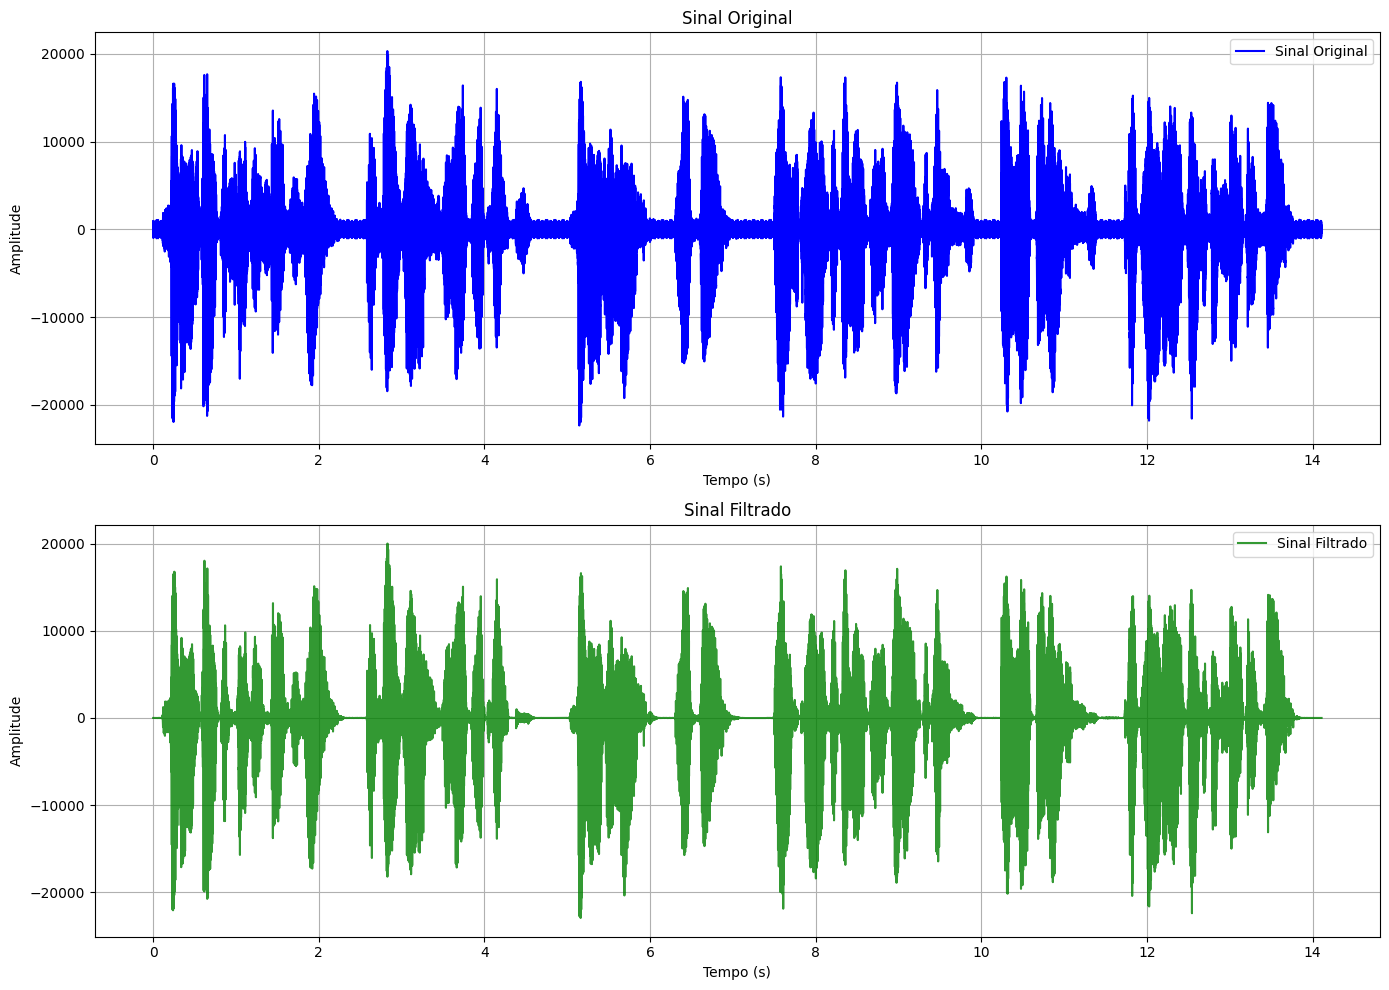

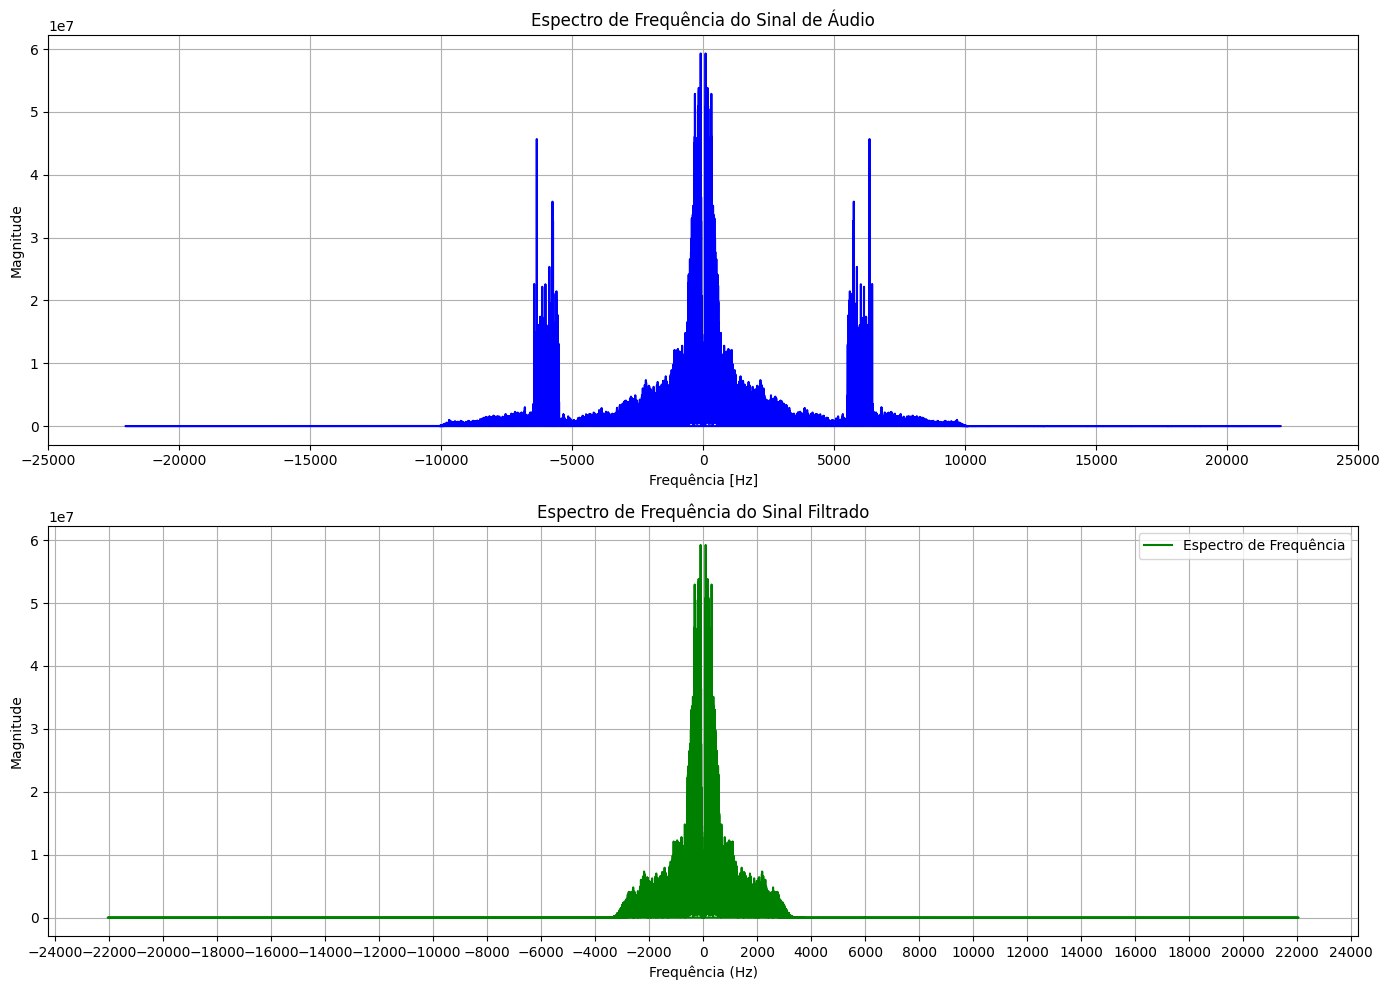

Reproduzindo o áudio filtrado:


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

# Supondo que x1, h_hamming1, time1, e f_s já estão definidos

# Filtragem do áudio
sinal_filtrado = convolucao_fft(x1, h_hamming1)
sinal_filtrado = np.clip(sinal_filtrado, -32768, 32767)  # Evita estouro de valores

# Criação da figura e dos subplots
plt.figure(figsize=(14, 10))

# Subplot para o sinal original
plt.subplot(2, 1, 1)
plt.plot(time1, x1, label="Sinal Original", color='blue')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Sinal Original")
plt.legend()
plt.grid(True)

# Subplot para o sinal filtrado
plt.subplot(2, 1, 2)
plt.plot(time1, sinal_filtrado, label="Sinal Filtrado", color='green', alpha=0.8)
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Sinal Filtrado")
plt.legend()
plt.grid(True)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o plot
plt.show()

# Calcula a FFT do sinal original e do sinal filtrado
n = len(x1)  # Número de pontos do sinal
frequencias_filtrado = fftfreq(len(sinal_filtrado), d=1/f_s1)
fft_filtrado = fft(sinal_filtrado)

# Criação da figura e dos subplots para o domínio da frequência
plt.figure(figsize=(14, 10))

# Subplot para o sinal original no domínio da frequência
plt.subplot(2, 1, 1)
plt.plot(xf1, np.abs(yf1), label="Espectro de Frequência", color = 'blue')
plt.xlabel("Frequência [Hz]")
plt.ylabel("Magnitude")
plt.title("Espectro de Frequência do Sinal de Áudio")
plt.grid(True)

# Adicionar ticks a cada 5000 Hz, simétricos em relação ao 0 Hz
max_freq = max(np.abs(xf1))  # Frequência máxima (positiva ou negativa)
max_freq = int(np.ceil(max_freq / 5000)) * 5000  # Arredonda para o próximo múltiplo de 1000 Hz
ticks_x1 = np.arange(-max_freq, max_freq + 5000, 5000)  # Ticks a cada 1000 Hz, simétricos
plt.xticks(ticks_x1)

# Subplot para o sinal filtrado no domínio da frequência
plt.subplot(2, 1, 2)
plt.plot(frequencias_filtrado, np.abs(fft_filtrado), label="Espectro de Frequência", color = 'green')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.title("Espectro de Frequência do Sinal Filtrado")
plt.legend()
plt.grid(True)

max_freq = max(np.abs(frequencias_filtrado))  # Frequência máxima (positiva ou negativa)
max_freq = int(np.ceil(max_freq / 2000)) * 2000  # Arredonda para o próximo múltiplo de 1000 Hz
ticks_x1 = np.arange(-max_freq, max_freq + 2000, 2000)  # Ticks a cada 1000 Hz, simétricos
plt.xticks(ticks_x1)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o plot do domínio da frequência
plt.show()

# Salva o sinal filtrado em um arquivo WAV
output_file = os.path.join('audios_filtrados', 'sinal_filtrado1.wav')  # Nome do arquivo de saída
write(output_file, f_s1, sinal_filtrado.astype(np.int16)) # Salva o sinal filtrado

# Reproduz o áudio filtrado diretamente no código
print("Reproduzindo o áudio filtrado:")
Audio(output_file)


##### X2 filtrado com h2


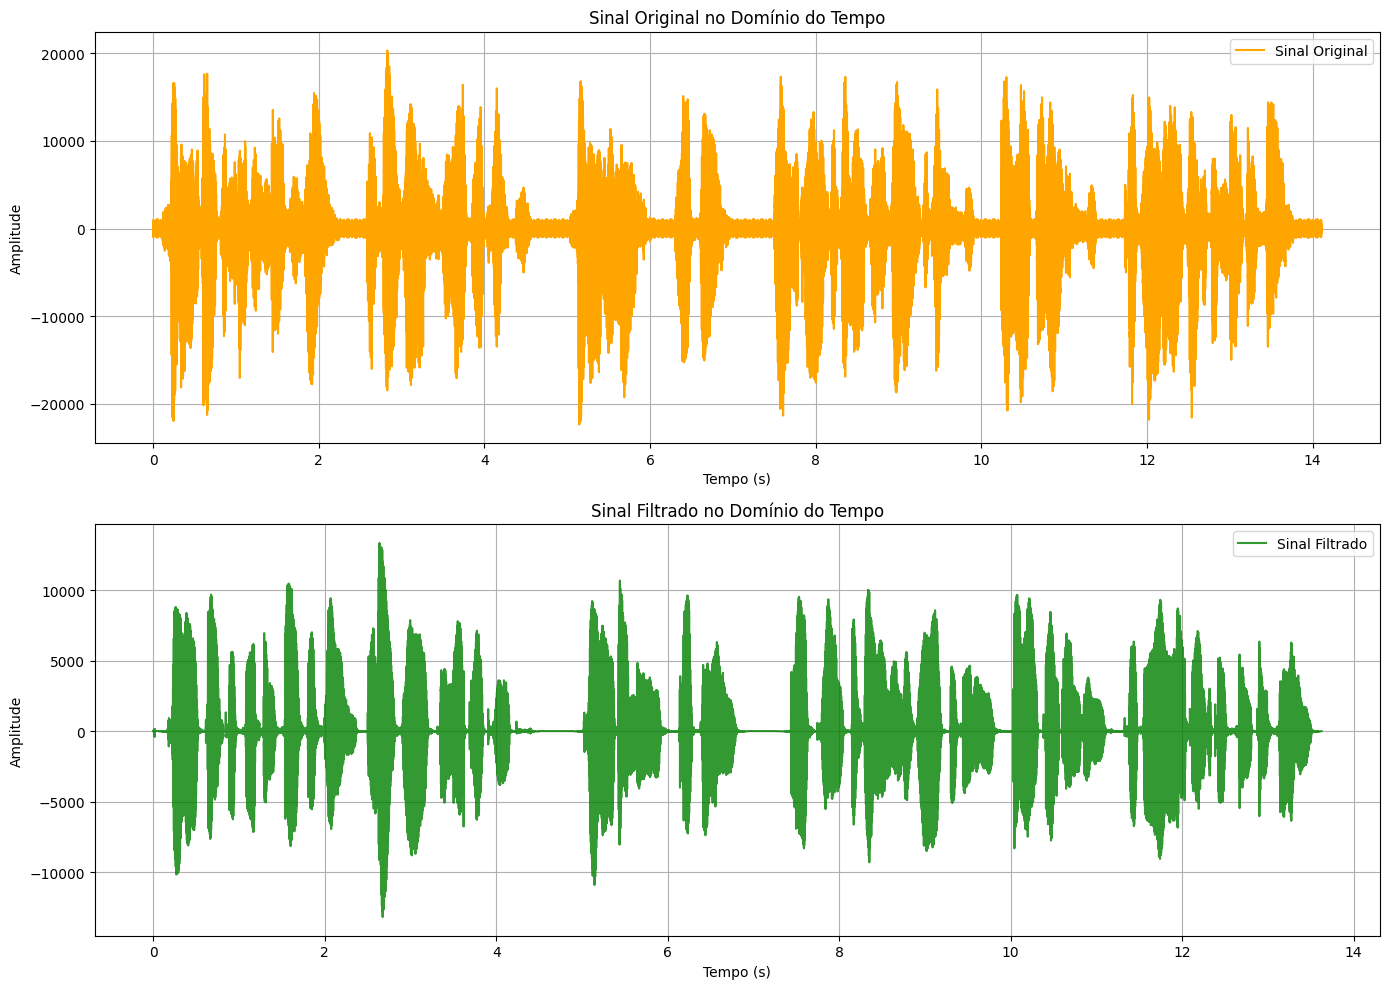

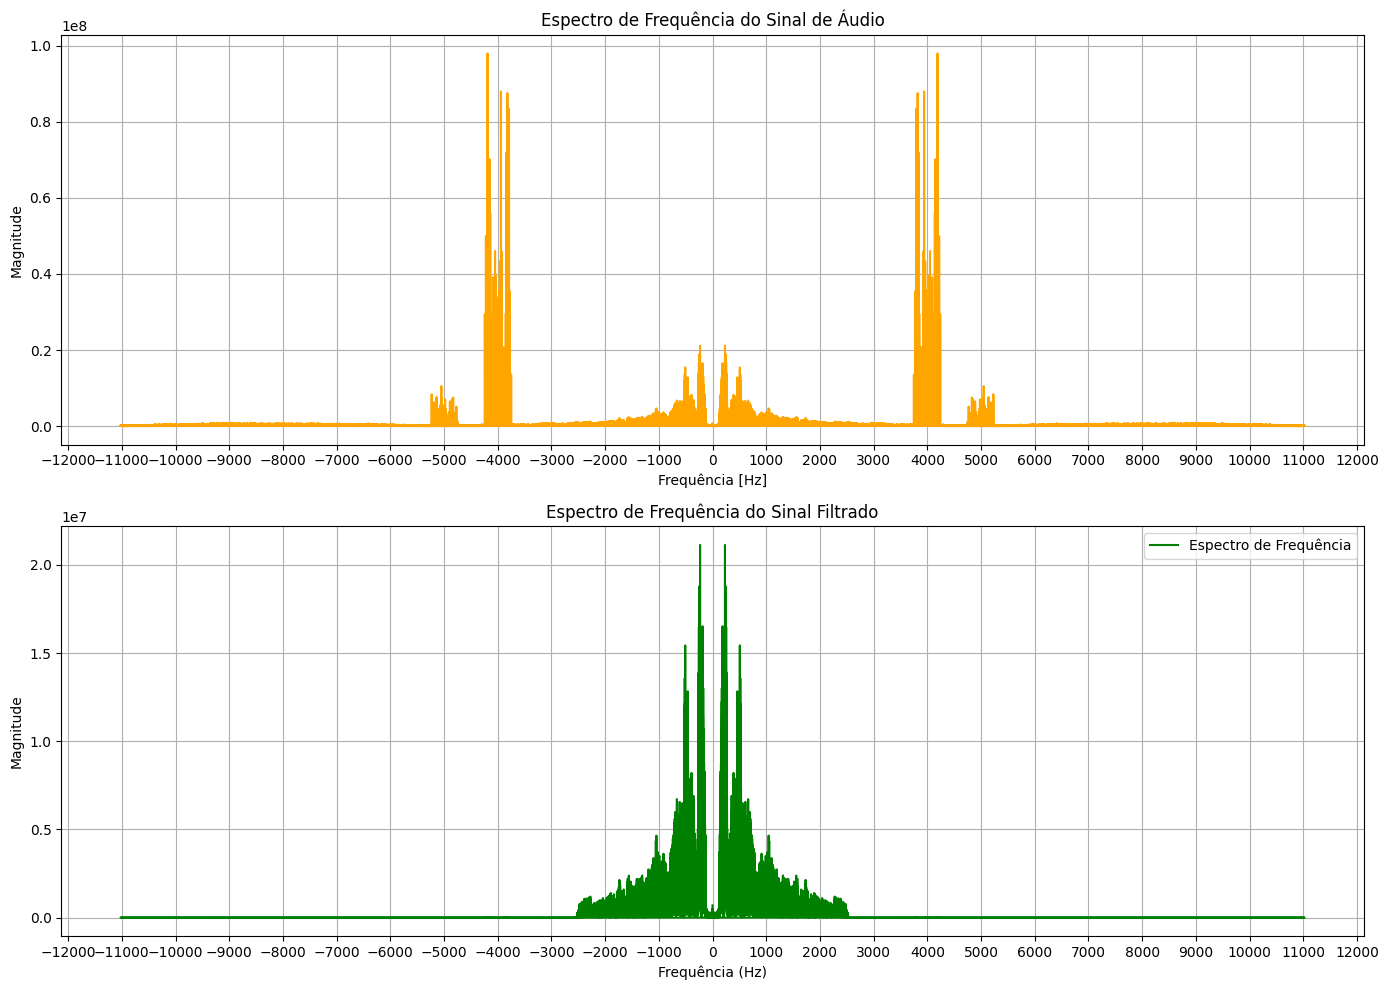

Reproduzindo o áudio filtrado:


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

# Supondo que x2, h_hamming2, time, e f_s já estão definidos

# Filtragem do áudio
sinal_filtrado = convolucao_fft(x2, h_hamming2)
sinal_filtrado = np.clip(sinal_filtrado, -32768, 32767)  # Evita estouro de valores

# Criação da figura e dos subplots para o domínio do tempo
plt.figure(figsize=(14, 10))

# Subplot para o sinal original no domínio do tempo
plt.subplot(2, 1, 1)
plt.plot(time1, x1, label="Sinal Original", color='orange')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Sinal Original no Domínio do Tempo")
plt.legend()
plt.grid(True)

# Subplot para o sinal filtrado no domínio do tempo
plt.subplot(2, 1, 2)
plt.plot(time2, sinal_filtrado, label="Sinal Filtrado", color='green', alpha=0.8)
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Sinal Filtrado no Domínio do Tempo")
plt.legend()
plt.grid(True)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o plot do domínio do tempo
plt.show()

# Calcula a FFT do sinal original e do sinal filtrado
n = len(x2)  # Número de pontos do sinal
frequencias_filtrado = fftfreq(len(sinal_filtrado), d=1/f_s2)
fft_filtrado = fft(sinal_filtrado)

# Criação da figura e dos subplots para o domínio da frequência
plt.figure(figsize=(14, 10))

# Subplot para o sinal original no domínio da frequência
plt.subplot(2, 1, 1)
plt.plot(xf2, np.abs(yf2), label="Espectro de Frequência", color = 'orange')
plt.xlabel("Frequência [Hz]")
plt.ylabel("Magnitude")
plt.title("Espectro de Frequência do Sinal de Áudio")
plt.grid(True)

# Adicionar ticks a cada 1000 Hz, simétricos em relação ao 0 Hz
max_freq = max(np.abs(xf2))  # Frequência máxima (positiva ou negativa)
max_freq = int(np.ceil(max_freq / 1000)) * 1000  # Arredonda para o próximo múltiplo de 1000 Hz
ticks_x1 = np.arange(-max_freq, max_freq + 1000, 1000)  # Ticks a cada 1000 Hz, simétricos
plt.xticks(ticks_x1)

# Subplot para o sinal filtrado no domínio da frequência
plt.subplot(2, 1, 2)
plt.plot(frequencias_filtrado, np.abs(fft_filtrado), label="Espectro de Frequência", color = 'green')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.title("Espectro de Frequência do Sinal Filtrado")
plt.legend()
plt.grid(True)

max_freq = max(np.abs(frequencias_filtrado))  # Frequência máxima (positiva ou negativa)
max_freq = int(np.ceil(max_freq / 1000)) * 1000  # Arredonda para o próximo múltiplo de 1000 Hz
ticks_x1 = np.arange(-max_freq, max_freq + 1000, 1000)  # Ticks a cada 1000 Hz, simétricos
plt.xticks(ticks_x1)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o plot do domínio da frequência
plt.show()

# Salva o sinal filtrado em um arquivo WAV
output_file = os.path.join('audios_filtrados', 'sinal_filtrado2.wav')  # Nome do arquivo de saída
write(output_file, f_s2, sinal_filtrado.astype(np.int16))  # Salva o sinal filtrado

# Reproduz o áudio filtrado diretamente no código
print("Reproduzindo o áudio filtrado:")
Audio(output_file)

## Fazendo uma filtragem Alternativa (Apêndice)


##### Criando o sinal filtrado

In [29]:
def filtro_passa_baixa_ideal(fft_sinal, freqs, freq_corte):
  filtro = np.zeros_like(freqs, dtype=float)
  filtro[np.abs(freqs) <= freq_corte] = 1.0 # Temos que manter as frequências abaixo da frequência de corte
  # Agora, vamos aplicar o filtro no domínio da frequência:
  filtro_aplicado = fft_sinal * filtro
  # Calculamos a Transformada Inversa -> Domínio do tempo
  sinal_filtrado = np.fft.ifft(filtro_aplicado)
  return np.real(sinal_filtrado)


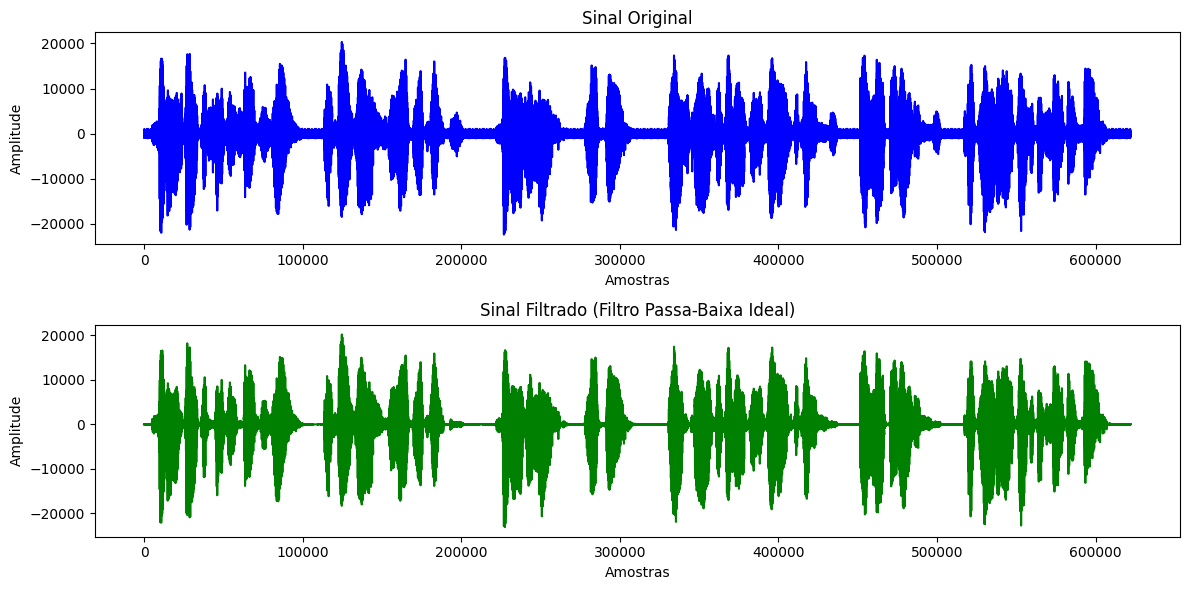

In [33]:
f = amostra_por_sec1
N = 622173 # Número de amostras
T = 1/f # Período

# Agora, vamos definir as frequências de corte do nosso filtro passa baixa, assimo como definido anteriormente
f_baixa = 3000

#Agora, vamos calcular a as frequências correspondentes de y1 e x1
xf1 = fftfreq(len(x1), 1 / amostra_por_sec1) # Frequências correspondentes

sinal_filtrado = filtro_passa_baixa_ideal(yf1, xf1, f_baixa)

# Plot do sinal original e do sinal filtrado
plt.figure(figsize=(12, 6))

# Sinal original
plt.subplot(2, 1, 1)
plt.plot(x1, color='b')
plt.title('Sinal Original')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

# Sinal filtrado
plt.subplot(2, 1, 2)
plt.plot(sinal_filtrado, color='green')
plt.title('Sinal Filtrado (Filtro Passa-Baixa Ideal)')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

sinal_filtrado_normalizado = sinal_filtrado / np.max(np.abs(sinal_filtrado))
sinal_filtrado_int16 = np.int16(sinal_filtrado_normalizado * 32767)
output_file = os.path.join('audios_filtrados', 'sinal_filtrado_alternativo1.wav')
write('output_file', amostra_por_sec1, sinal_filtrado_int16)

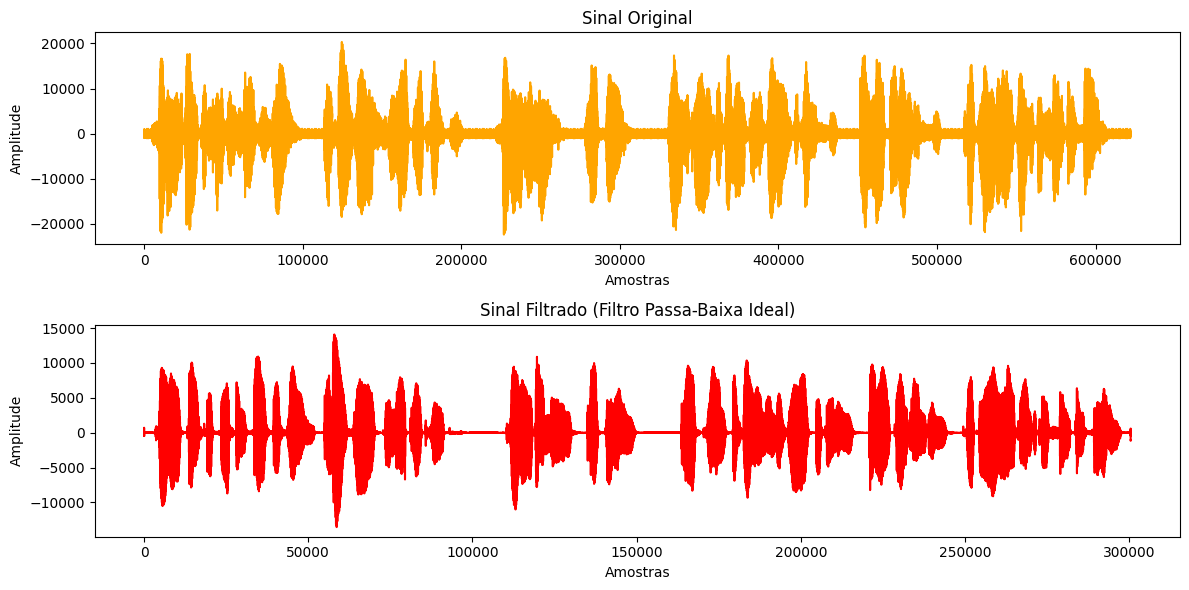

In [ ]:
f = amostra_por_sec2
N = 300449 # Número de amostras
T = 1/f # Período

# Agora, vamos definir as frequências de corte do nosso filtro passa baixa, assimo como definido anteriormente
f_baixa = 3500

#Agora, vamos calcular a as frequências correspondentes de y1 e x1
xf2 = fftfreq(len(x2), 1 / amostra_por_sec2) # Frequências correspondentes
yf2 = np.fft.fft(x2)

sinal_filtrado = filtro_passa_baixa_ideal(yf2, xf2, f_baixa)

# Plot do sinal original e do sinal filtrado
plt.figure(figsize=(12, 6))

# Sinal original
plt.subplot(2, 1, 1)
plt.plot(x1, color='orange')
plt.title('Sinal Original')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

# Sinal filtrado
plt.subplot(2, 1, 2)
plt.plot(sinal_filtrado, color='r')
plt.title('Sinal Filtrado (Filtro Passa-Baixa Ideal)')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

sinal_filtrado_normalizado = sinal_filtrado / np.max(np.abs(sinal_filtrado))
sinal_filtrado_int16 = np.int16(sinal_filtrado_normalizado * 32767)
write('sinal_filtrado_alternativo2.wav', amostra_por_sec2, sinal_filtrado_int16)

